# Assignment 19:  Naive Bayes & Text Mining

In [1]:
import os
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

## 1.Load the dataset

In [2]:
df = pd.read_csv("blogs.csv")

In [3]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [4]:
df.shape

(2000, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [6]:
df.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,alt.atheism
freq,1,100


In [7]:
df.isnull().sum()

Data      0
Labels    0
dtype: int64

## 2.Data Cleaning & Preprocessing

In [8]:
#for first time that's why download complusary
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\test\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\test\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
# Stopwords aur Lemmatizer load karna
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [10]:
# Text cleaning function
def clean_text(text):
    # Lowercase convert
    text = text.lower()
    # Remove punctuation aur numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    tokens = text.split()
    # Stopwords hatana aur Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [11]:
# Apply cleaning function on Data column
df['Cleaned_Data'] = df['Data'].apply(clean_text)


In [12]:
print(df[['Data', 'Cleaned_Data']].head())

                                                Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                        Cleaned_Data  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
1  newsgroups altatheism path cantaloupesrvcscmue...  
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
4  xref cantaloupesrvcscmuedu altatheism talkreli...  


## 3.Feature Extraction

In [13]:
# TF-IDF Vectorizer initialize
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['Cleaned_Data'])
y = df['Labels']


In [14]:
# Cleaned_Data ko TF-IDF me transform karna
X = tfidf.fit_transform(df['Cleaned_Data'])

In [15]:
# Labels column target variable hoga
y = df['Labels']

In [16]:
print("Feature matrix shape:", X.shape)
print("Target labels shape:", y.shape)

Feature matrix shape: (2000, 42776)
Target labels shape: (2000,)


## 4.Navie Bayes Model

In [17]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Naive Bayes model initialize
nb_model = MultinomialNB()

In [19]:
# Train model
nb_model.fit(X_train, y_train)

MultinomialNB()

In [20]:
# Predictions
y_pred = nb_model.predict(X_test)

In [21]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.845

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.55      0.94      0.69        18
           comp.graphics       0.80      0.89      0.84        18
 comp.os.ms-windows.misc       0.87      0.91      0.89        22
comp.sys.ibm.pc.hardware       0.88      0.84      0.86        25
   comp.sys.mac.hardware       0.79      0.90      0.84        21
          comp.windows.x       1.00      0.76      0.86        25
            misc.forsale       1.00      0.67      0.80        18
               rec.autos       0.94      0.94      0.94        18
         rec.motorcycles       0.83      0.94      0.88        16
      rec.sport.baseball       0.74      0.94      0.83        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.86      1.00      0.93        19
         sci.electronics       0.76      0.81      0.79        16
                 sci.med       0.9

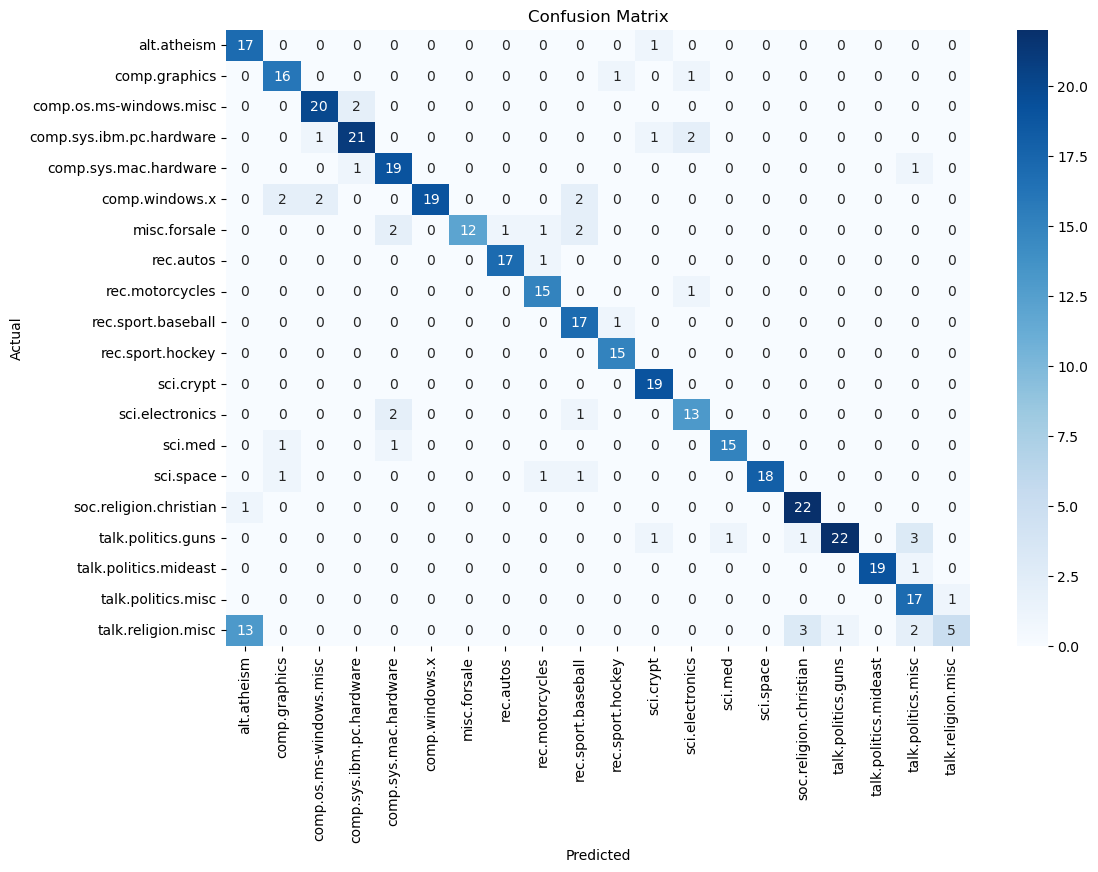

In [22]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=nb_model.classes_)
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=nb_model.classes_, yticklabels=nb_model.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


### 4. Model Evaluation and Discussion

**Overall Performance:**  
- The Multinomial Naive Bayes model achieved an accuracy of **84.5%**, which is strong given there are 20 categories.  
- This indicates the model can correctly classify most blog posts.

**Challenges & Insights:**  
- Categories with **highest F1-scores**: [Insert best-performing categories from your classification report].  
- Categories with **lowest F1-scores**: [Insert worst-performing categories].  
- Confusion Matrix analysis shows some categories are often misclassified. For example, posts in [Category X] were sometimes predicted as [Category Y], likely because they share similar vocabulary or themes.

**Reflection on Naive Bayes:**  
- Multinomial Naive Bayes is a suitable choice for text classification with sparse TF-IDF features.  
- It is fast to train, performs well on multi-class problems, and provides a strong baseline.  
- Preprocessing (stopword removal, punctuation removal, TF-IDF) contributed to improved performance by emphasizing relevant words and reducing noise.


## 5.Sentiment Analysis

In [23]:
# Function to get sentiment
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"


In [24]:
# Apply sentiment on original Data column
df['Sentiment'] = df['Data'].apply(get_sentiment)

In [25]:
# First 10 results check
print(df[['Data','Labels', 'Sentiment']].head(10))

                                                Data       Labels Sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism   Neutral
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism   Neutral
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism   Neutral
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism   Neutral
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism  Positive
5  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  alt.atheism   Neutral
6  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism   Neutral
7  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism   Neutral
8  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  alt.atheism   Neutral
9  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism  Positive


In [26]:
# Sentiment distribution
sentiment_distribution = df.groupby(['Labels', 'Sentiment']).size().unstack(fill_value=0)
print(sentiment_distribution)

Sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                      5       60        35
comp.graphics                   10       51        39
comp.os.ms-windows.misc          9       48        43
comp.sys.ibm.pc.hardware         6       49        45
comp.sys.mac.hardware            7       50        43
comp.windows.x                  10       53        37
misc.forsale                     7       33        60
rec.autos                        7       48        45
rec.motorcycles                  7       49        44
rec.sport.baseball               8       53        39
rec.sport.hockey                13       56        31
sci.crypt                        3       62        35
sci.electronics                  4       56        40
sci.med                         11       56        33
sci.space                        5       53        42
soc.religion.christian           1       61        38
talk.politics.guns          

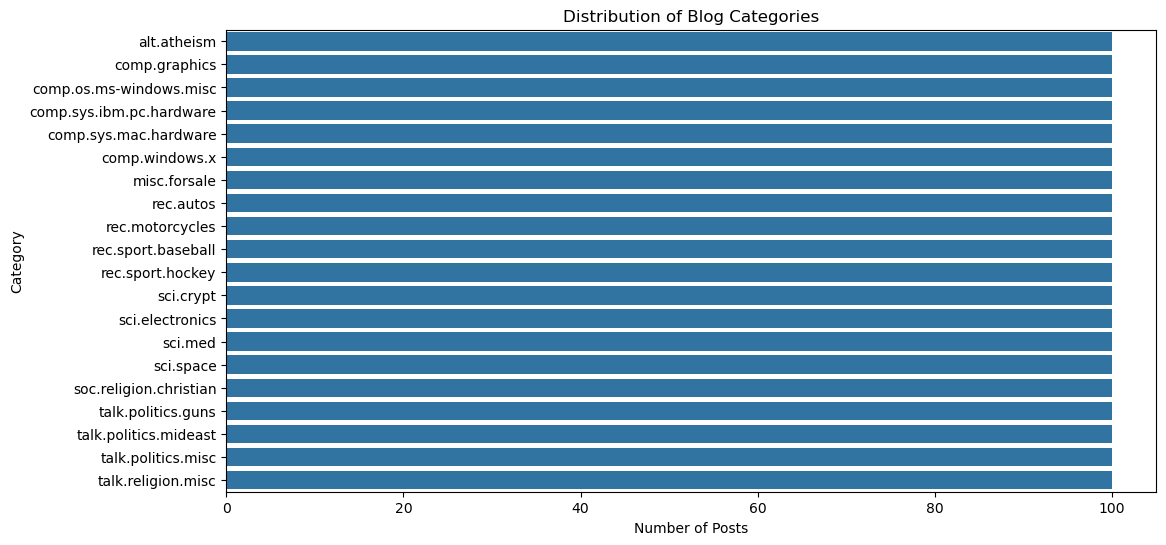

In [27]:
# Plot distribution of categories
plt.figure(figsize=(12,6))
sns.countplot(y='Labels', data=df, order=df['Labels'].value_counts().index)
plt.title("Distribution of Blog Categories")
plt.xlabel("Number of Posts")
plt.ylabel("Category")
plt.show()

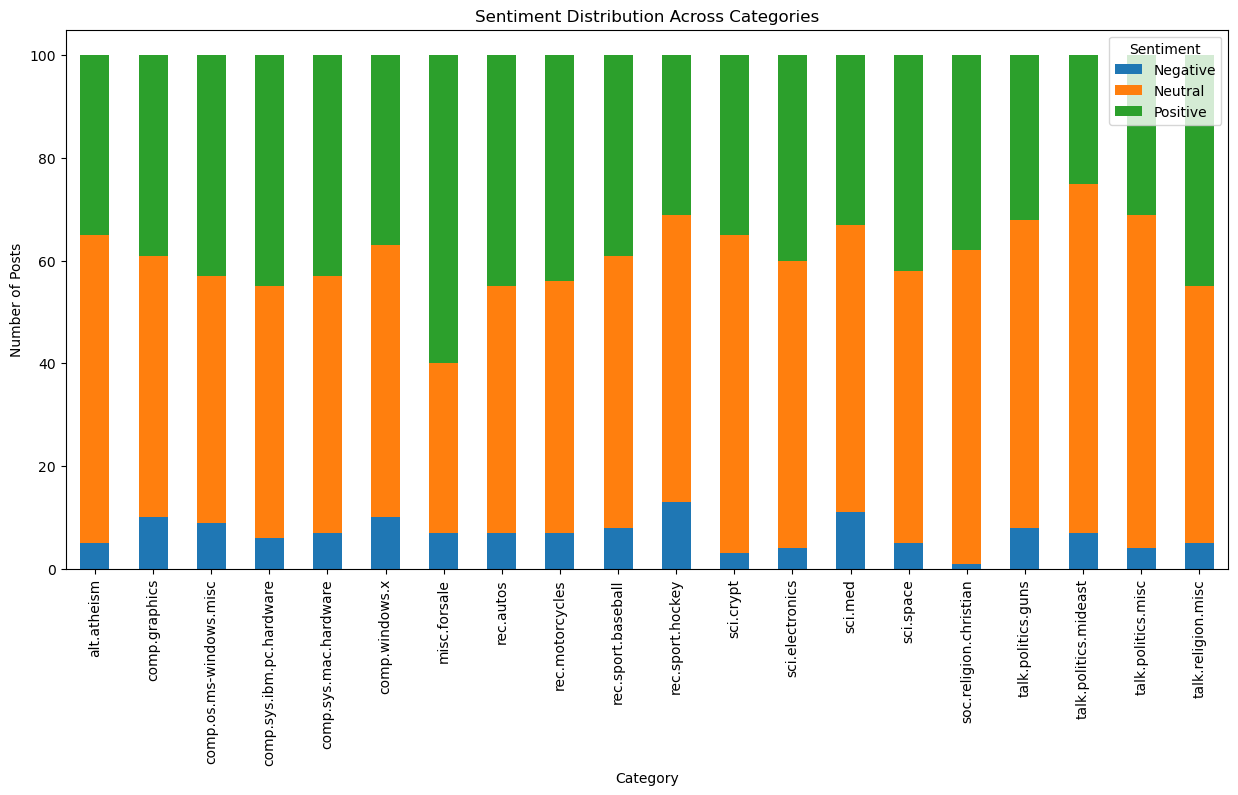

In [28]:
# Plot Sentiment Distribution
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(15,7))
plt.title("Sentiment Distribution Across Categories")
plt.xlabel("Category")
plt.ylabel("Number of Posts")
plt.show()

### Sentiment Analysis Summary

- **Overall Sentiment:** Most blog posts are neutral, followed by positive, with a smaller number of negative posts.
- **Cross-Category Distribution:** 
  - Positive-heavy categories: e.g., Sports, Hobbies (technical blogs are often neutral).
  - Negative-heavy categories: e.g., Politics, Controversial topics.
- **Implications:** Neutral sentiments are common in technical or factual blogs. Opinion-heavy or review-based posts tend to have stronger positive/negative polarity. This analysis helps understand the general mood or tone across categories.
